In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_csv('Connections.csv')
df.head(10)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Bruno Pedro,Vieira,https://www.linkedin.com/in/brunopedrovieira,NaN,Expert BI Solutions,Analista de Dados/BI Sênior,15 Jan 2025
1,Julia,Mageste,https://www.linkedin.com/in/julia-mageste-damazio,NaN,Hotmart,Data Manager,15 Jan 2025
2,Marcelo Richard,Maia,https://www.linkedin.com/in/marcelo-richard-ma...,NaN,Banco Mercantil,Analista de Dados - Experiência do Cliente,15 Jan 2025
3,Luana Sílvia,dos Santos,https://www.linkedin.com/in/luana-s%C3%ADlvia-...,NaN,Loggi,Senior Data Analyst,15 Jan 2025
4,Karina,Carneiro,https://www.linkedin.com/in/karina-carneiro-86...,NaN,Take Blip,Data & Analytics Lead,15 Jan 2025
5,Leonardo,Bernardi,https://www.linkedin.com/in/leonardo-bernardi-...,NaN,aiqfome,"Coordenador de Dados, Analytics, Growth e Mone...",15 Jan 2025
6,Graziele,Alexandrina Diniz,https://www.linkedin.com/in/graziele-alexandri...,NaN,Unimed-BH,Analista de dados,14 Jan 2025
7,Gabriela,Morais,https://www.linkedin.com/in/gabrielamoraisdo,NaN,Toro Investimentos,Analista de Dados e Negócios Pleno,10 Jan 2025
8,Fernando,Schneider Júnior,https://www.linkedin.com/in/fernandoeq,NaN,Blip,Data Analyst,10 Jan 2025
9,Alexandra,Chaves,https://www.linkedin.com/in/alexandra-chaves,NaN,Sandvik,HR&EHS Manager,07 Jan 2025


In [117]:
print(f'Tenho {df.shape[0]} conexões.')

Tenho 1250 conexões.


In [118]:
df.isna().sum()

First Name         17
Last Name          17
URL                17
Email Address    1209
Company            28
Position           26
Connected On        0
dtype: int64

In [119]:
pd.DataFrame(
    {'Tipo':df.dtypes,
     'Porcentagem de nulos':(df.isna().sum()/df.shape[0])*100}
)

,Tipo,Porcentagem de nulos
First Name,object,1.36
Last Name,object,1.36
URL,object,1.36
Email Address,object,96.72
Company,object,2.24
Position,object,2.08
Connected On,object,0.00


In [120]:
df['Data_Conexao'] = pd.to_datetime(df['Connected On'])
df.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On,Data_Conexao
0,Bruno Pedro,Vieira,https://www.linkedin.com/in/brunopedrovieira,NaN,Expert BI Solutions,Analista de Dados/BI Sênior,15 Jan 2025,2025-01-15
1,Julia,Mageste,https://www.linkedin.com/in/julia-mageste-damazio,NaN,Hotmart,Data Manager,15 Jan 2025,2025-01-15
2,Marcelo Richard,Maia,https://www.linkedin.com/in/marcelo-richard-ma...,NaN,Banco Mercantil,Analista de Dados - Experiência do Cliente,15 Jan 2025,2025-01-15
3,Luana Sílvia,dos Santos,https://www.linkedin.com/in/luana-s%C3%ADlvia-...,NaN,Loggi,Senior Data Analyst,15 Jan 2025,2025-01-15
4,Karina,Carneiro,https://www.linkedin.com/in/karina-carneiro-86...,NaN,Take Blip,Data & Analytics Lead,15 Jan 2025,2025-01-15


In [121]:
df['Data_Conexao'].min(), df['Data_Conexao'].max()

(Timestamp('2013-09-27 00:00:00'), Timestamp('2025-01-15 00:00:00'))

In [122]:
df['Data_Conexao'].max() - df['Data_Conexao'].min()

Timedelta('4128 days 00:00:00')

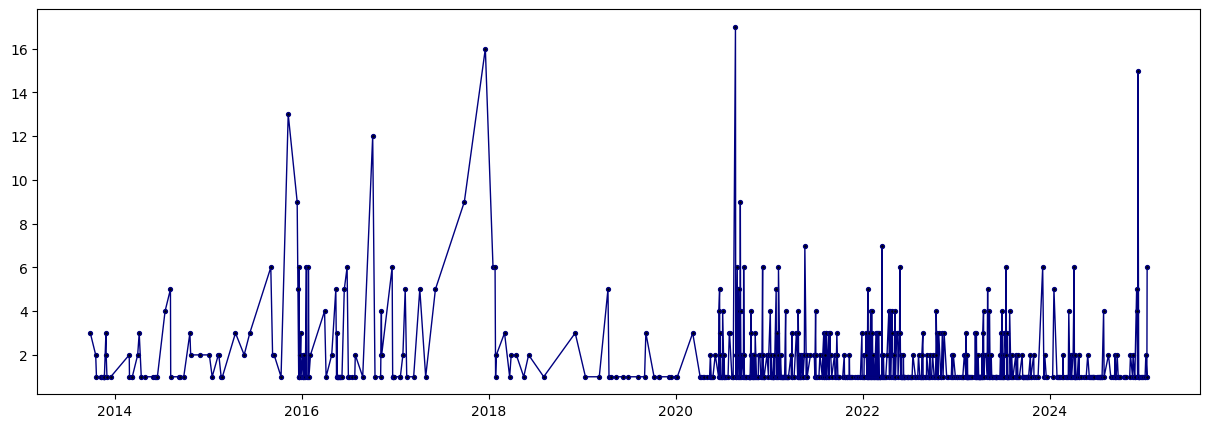

In [123]:
df_conexoes = df.groupby('Data_Conexao')['Connected On'].count()

plt.figure(figsize=(15,5))
plt.plot(df_conexoes,color='navy',marker='o',markersize=2.8,linewidth=1,markerfacecolor='k')

In [124]:
df_conexoes = df_conexoes.reset_index()

In [125]:
df_conexoes['Connected On'].describe()

count    686.000000
mean       1.822157
std        1.708845
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       17.000000
Name: Connected On, dtype: float64

In [126]:
df_conexoes[ df_conexoes['Connected On'] ==17 ]

,Data_Conexao,Connected On
177,2020-08-21,17


Text(0.5, 1.0, 'Nº de conexões por empresa')

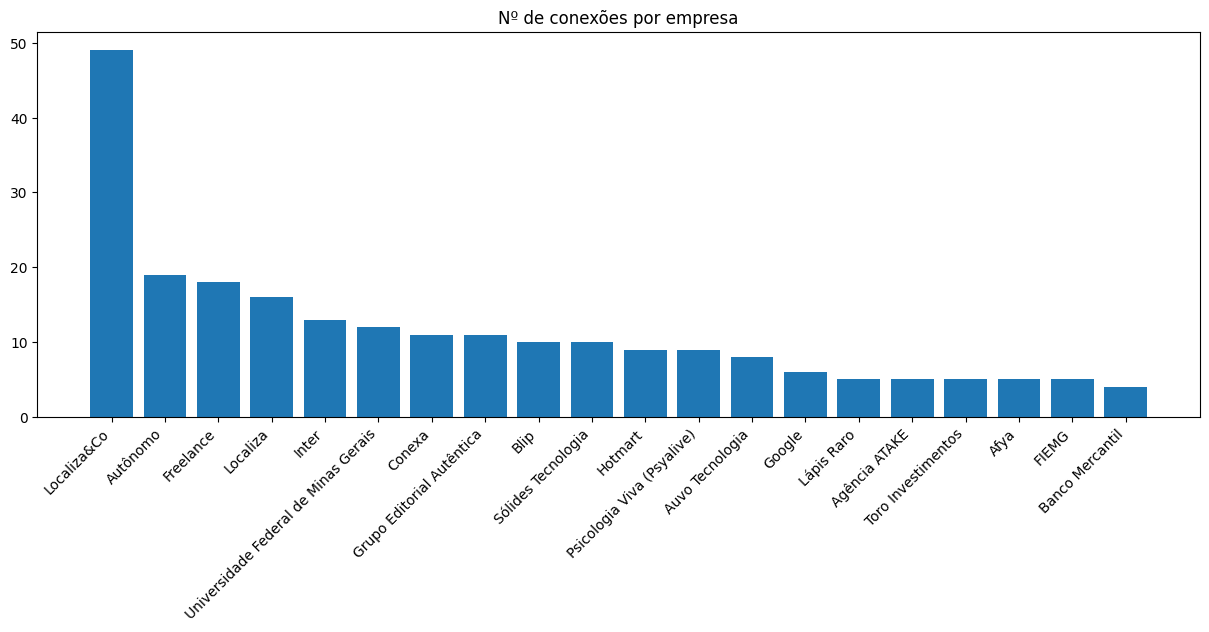

In [139]:
df_empresas = df.Company.value_counts()

plt.figure(figsize=(15,5))
plt.bar(df_empresas.index[:20], df_empresas[:20])
plt.xticks(rotation=45,ha='right')
plt.title('Nº de conexões por empresa')

In [136]:
df.Position = df.Position.str.title()

Text(0.5, 1.0, 'Nº de conexões por cargo')

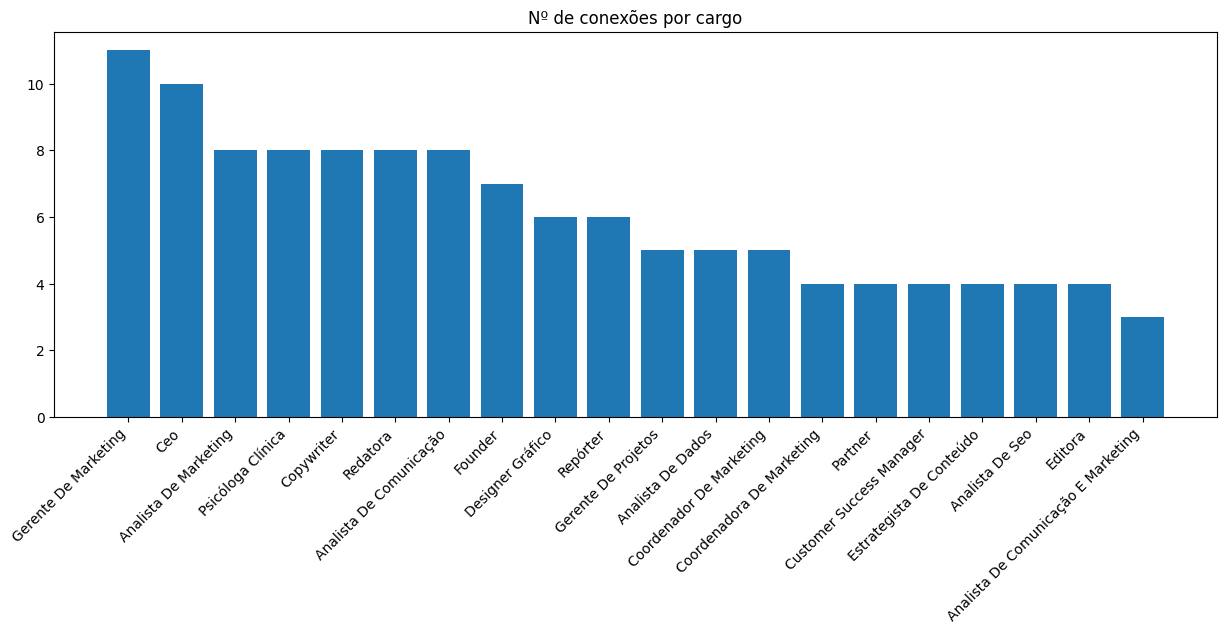

In [138]:
df_cargo = df.Position.value_counts()

plt.figure(figsize=(15,5))
plt.bar(df_cargo.index[:20], df_cargo[:20])
plt.xticks(rotation=45,ha='right')
plt.title('Nº de conexões por cargo')

In [140]:
df[df.Position.isna() == True ] 

,First Name,Last Name,URL,Email Address,Company,Position,Connected On,Data_Conexao
22,João,Jordão,https://www.linkedin.com/in/jo%C3%A3o-jord%C3%...,NaN,NaN,NaN,10 Dec 2024,2024-12-10
23,Yasmim,Castro,https://www.linkedin.com/in/yasmim-castro-a167...,NaN,NaN,NaN,10 Dec 2024,2024-12-10
152,Vitor,Pereira,https://www.linkedin.com/in/vitor-e-g-pereira,NaN,NaN,NaN,16 Nov 2023,2023-11-16
181,NaN,NaN,NaN,NaN,NaN,NaN,10 Aug 2023,2023-08-10
210,NaN,NaN,NaN,NaN,NaN,NaN,07 Jul 2023,2023-07-07
213,NaN,NaN,NaN,NaN,NaN,NaN,06 Jul 2023,2023-07-06
260,NaN,NaN,NaN,NaN,NaN,NaN,26 Apr 2023,2023-04-26
274,Celina,Batista,https://www.linkedin.com/in/celina-batista-978...,NaN,NaN,NaN,13 Apr 2023,2023-04-13
279,NaN,NaN,NaN,NaN,NaN,NaN,06 Apr 2023,2023-04-06
310,NaN,NaN,NaN,NaN,NaN,NaN,08 Feb 2023,2023-02-08


In [148]:
df_sem_na = df.dropna(axis=0,subset=['Position'])
conexoes_dados = df_sem_na[df_sem_na.Position.str.match('.*(D|d)ados.*|.*(D|d)ata.*|.* BI ?.*|.* bi ?.*')]
conexoes_dados.head(5)

,First Name,Last Name,URL,Email Address,Company,Position,Connected On,Data_Conexao
0,Bruno Pedro,Vieira,https://www.linkedin.com/in/brunopedrovieira,NaN,Expert BI Solutions,Analista De Dados/Bi Sênior,15 Jan 2025,2025-01-15
1,Julia,Mageste,https://www.linkedin.com/in/julia-mageste-damazio,NaN,Hotmart,Data Manager,15 Jan 2025,2025-01-15
2,Marcelo Richard,Maia,https://www.linkedin.com/in/marcelo-richard-ma...,NaN,Banco Mercantil,Analista De Dados - Experiência Do Cliente,15 Jan 2025,2025-01-15
3,Luana Sílvia,dos Santos,https://www.linkedin.com/in/luana-s%C3%ADlvia-...,NaN,Loggi,Senior Data Analyst,15 Jan 2025,2025-01-15
4,Karina,Carneiro,https://www.linkedin.com/in/karina-carneiro-86...,NaN,Take Blip,Data & Analytics Lead,15 Jan 2025,2025-01-15


Text(0.5, 1.0, 'Nº de conexões por cargo na área de dados')

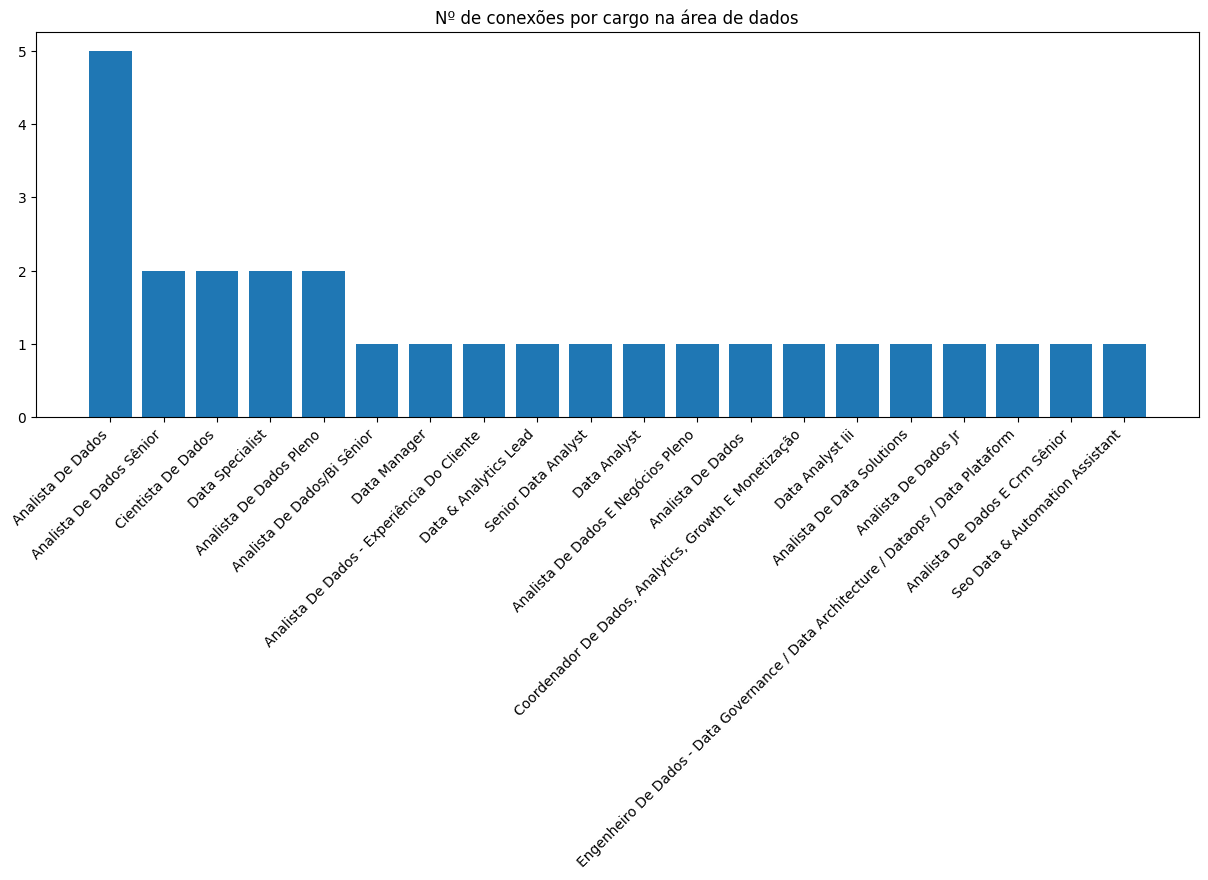

In [152]:
por_cargo_dados = conexoes_dados.Position.value_counts()

plt.figure(figsize=(15,5))
plt.bar(por_cargo_dados.index[:20], por_cargo_dados[:20])
plt.xticks(rotation=45,ha='right')
plt.title('Nº de conexões por cargo na área de dados')